In [1]:
from visualizer import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df_all = load_results("visualize_results/128.csv", 
                      "visualize_results/256.csv", 
                      "visualize_results/512.csv")

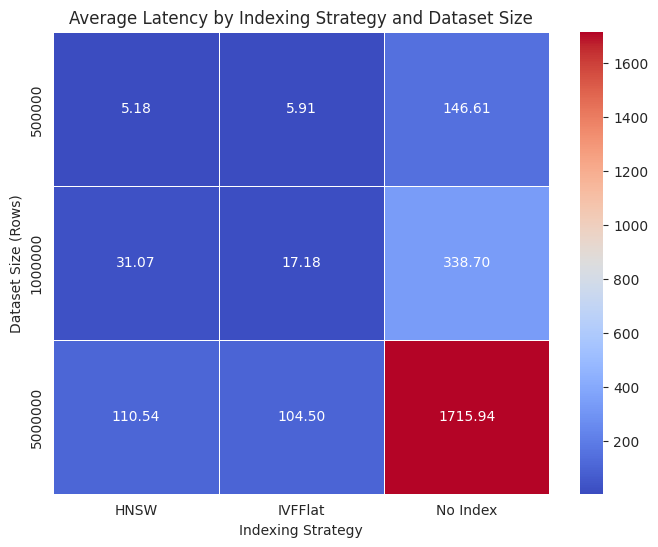

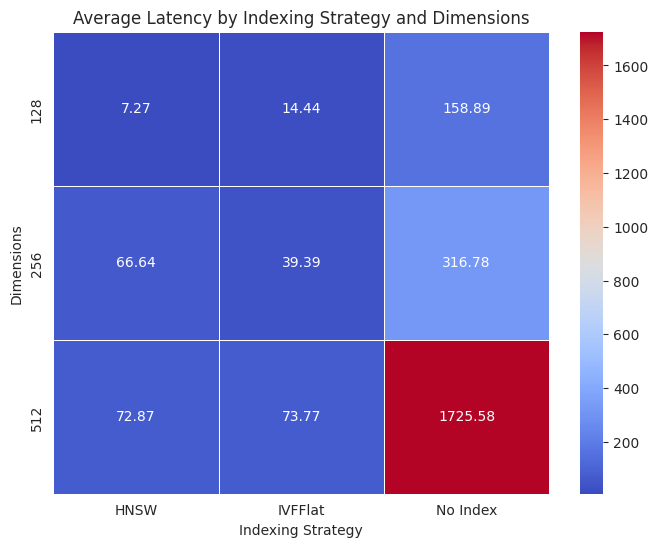

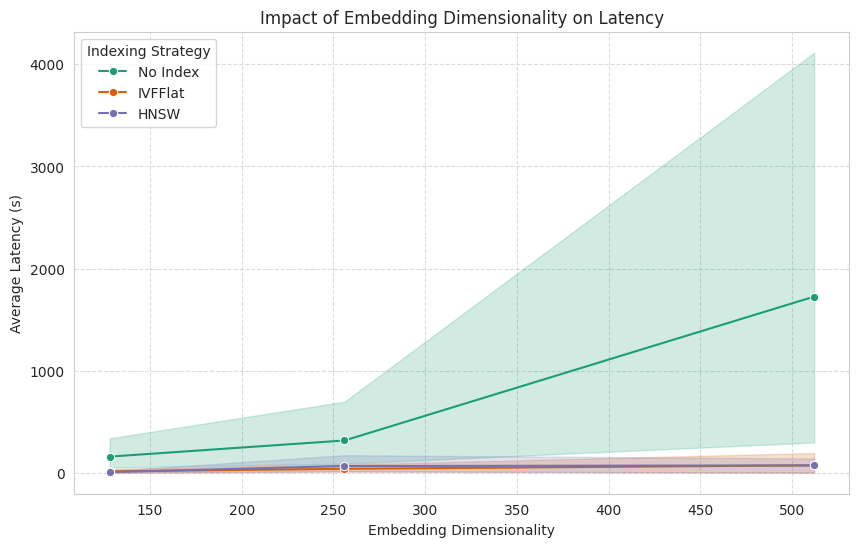

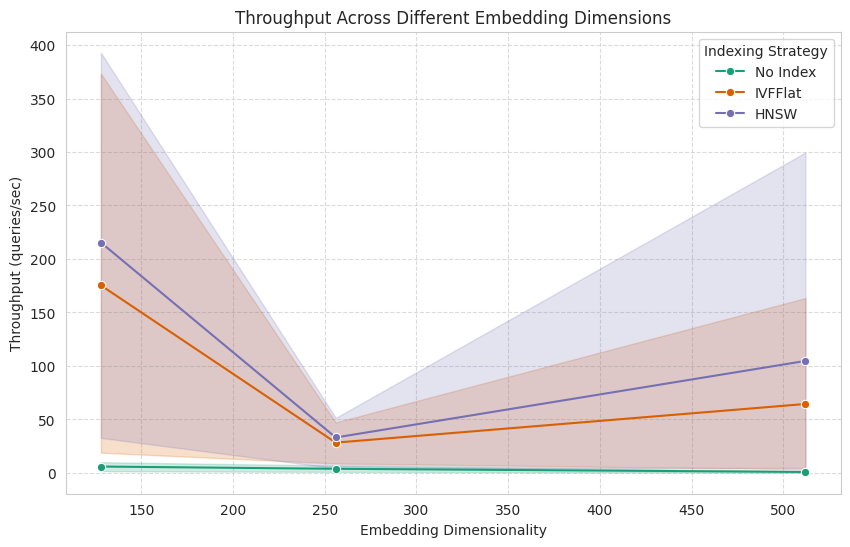

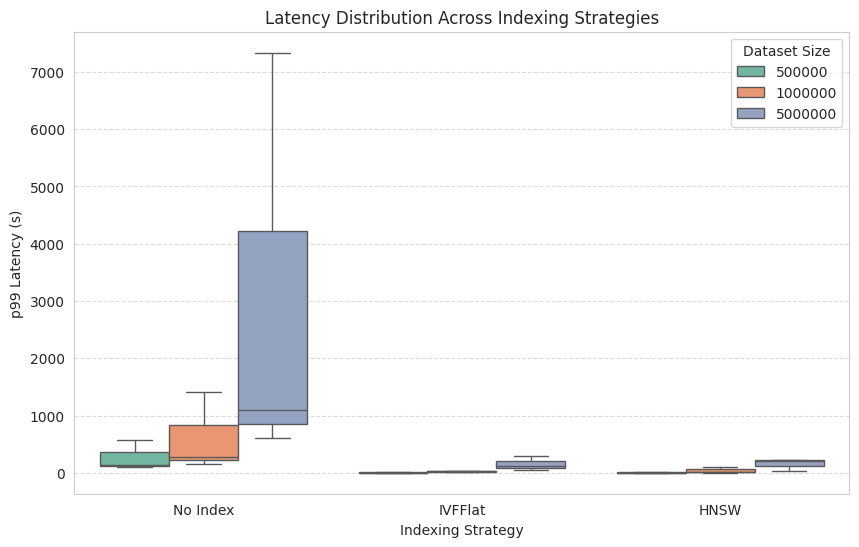

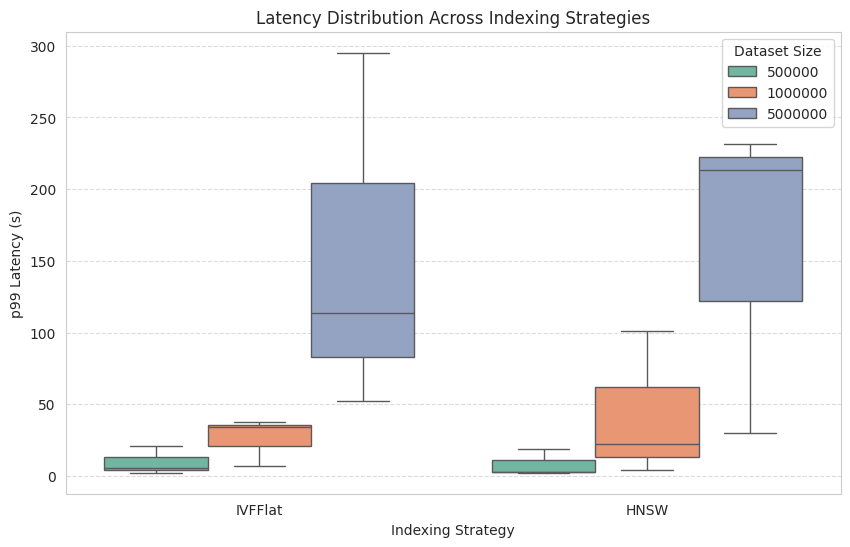

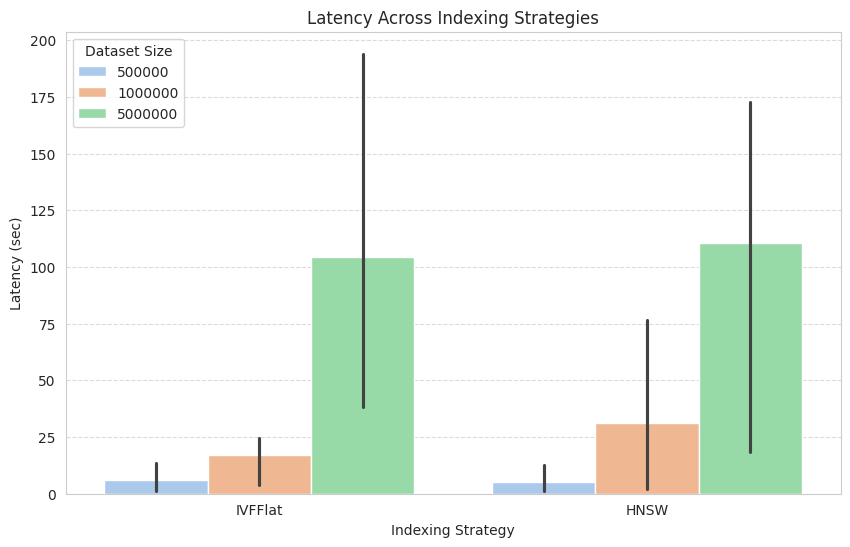

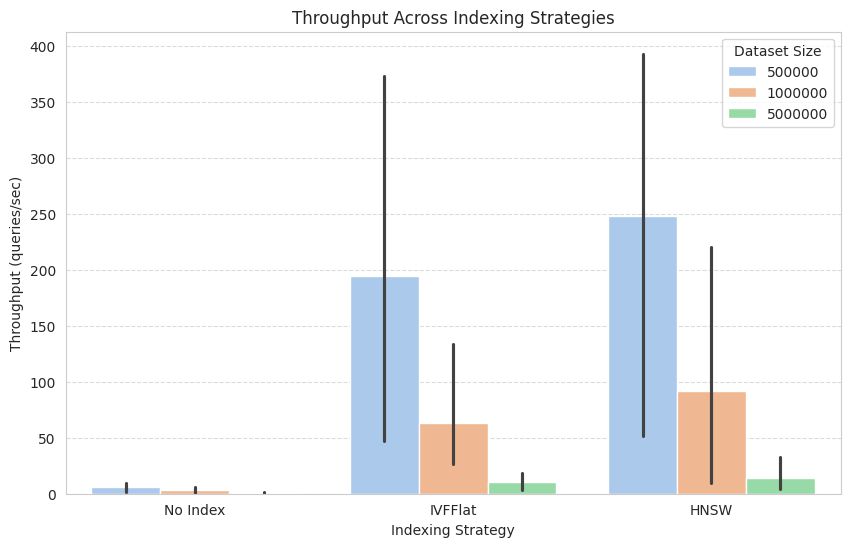

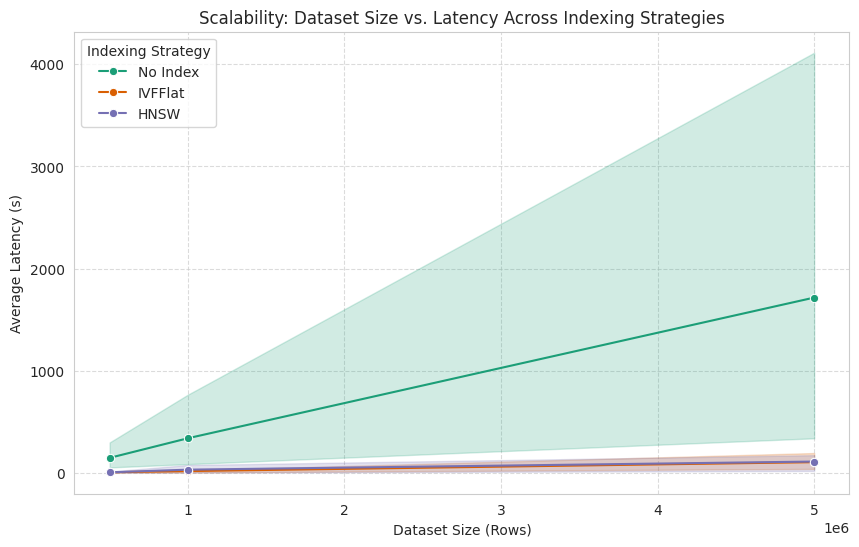

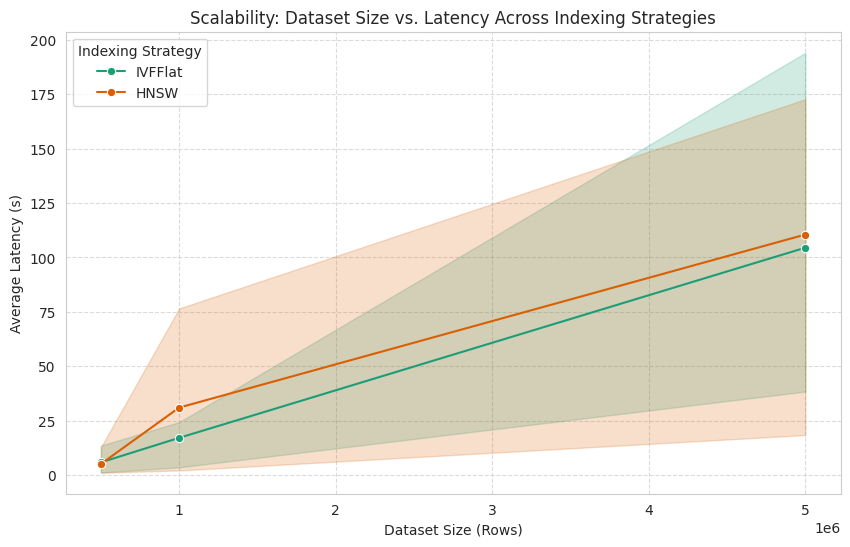

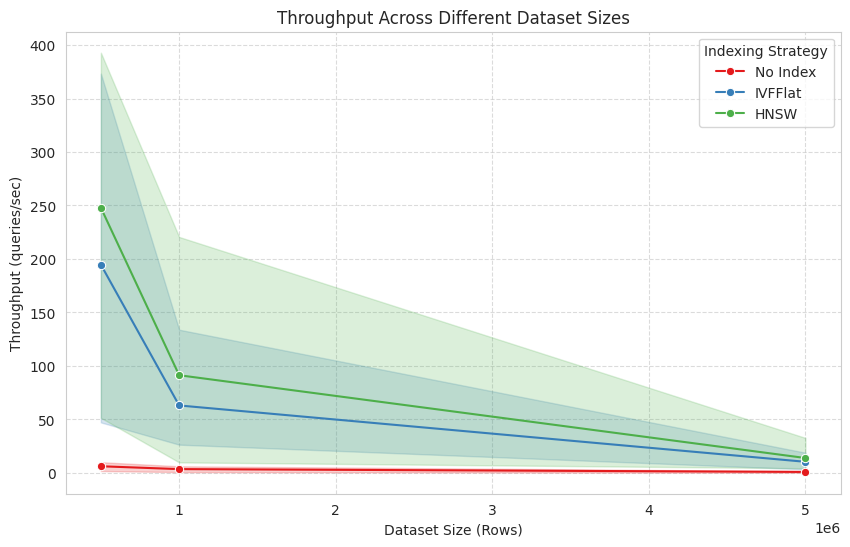

In [3]:
plot_latency_heatmap_size(df_all)
plot_latency_heatmap_dims(df_all)

plot_latency_vs_dimension(df_all)
plot_throughput_vs_dimension(df_all)

plot_latency_distribution(df_all)
plot_latency_distribution_only_index(df_all)

plot_latency_vs_indexing(df_all)
plot_throughput_vs_indexing(df_all)

plot_scalability(df_all)
plot_scalability_only_index(df_all)

plot_throughput_vs_dataset_size(df_all)